In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import matplotlib.transforms as mtransforms
from keras.layers import Dense
from keras.layers import Input
from keras.layers import concatenate
from tensorflow.keras import layers
from keras.models import Model
from keras import regularizers
# from keras.engine.training import Model
from keras.callbacks import ModelCheckpoint
from copy import copy
from tensorflow import sin
from keras.backend import set_value
from numpy.fft import rfft, irfft, rfftfreq
from scipy import pi, signal, fftpack
from datetime import datetime
import glob
import os
import scipy.sparse as sp
import math
import pywt
import matplotlib.pyplot as plt
import numpy as np
import pywt
import warnings
warnings.filterwarnings("ignore")
# from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
K = 12
d = [ [ 0 for y in range(120) ] for x in range(10) ]
for i in range(10):
  for j in range(120):
    if int(j/K) == i:
      d[i][j] = 1/K
M = torch.as_tensor(d)

Q = [ [ 1 for y in range(10) ] for x in range(10) ]
for i in range(10):
  for j in range(10):
    W[i][j] = abs(j-i)
Q = torch.as_tensor(Q)

I = [ 1 for x in range(10) ]
I = torch.as_tensor(I)
H = torch.diag(torch.matmul(Q, I), 0) - Q
H


tensor([[ 9, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1,  9, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1,  9, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1,  9, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1,  9, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1,  9, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1,  9, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1,  9, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1,  9, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1,  9]])


#KDD

In [ ]:
K = 12
d = [ [ 0 for y in range(60) ] for x in range(5) ]
for i in range(5):
  for j in range(60):
    if int(j/K) == i:
      d[i][j] = 1/K
M = torch.as_tensor(d, dtype = torch.float64)

E = torch.zeros(5, 5, dtype=torch.float64)

# Fill in the values of E
for i in range(5):
    for j in range(5):
        E[i][j] = float(torch.abs(torch.tensor(j - i, dtype=torch.float64)))



I = [ 1 for x in range(5) ]
I = torch.as_tensor(I, dtype = torch.float64)
H = torch.diag(torch.matmul(E, I), 0) - E


from cvxpy import *
import numpy as np
import scipy as sp
from scipy import sparse
import osqp

PLR_KDD = pd.DataFrame()

for i in range(14):
  np.random.seed(1)
  h = 60
  gamma = 50
  ts = normalized_df.iloc[:,i].values
  x = Variable(h)
  y = Variable(h)

  objective = norm(ts - x - y, 2) + gamma * ((y.T @ ((M.T @ H) @ M)) @ y)

  # Solve with OSQP
  Problem(Minimize(objective)).solve(verbose=True)

  for j in range(60):
    PLR_KDD.loc[j, i] = x.value[j]

PLR_KDD

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Dec 21 12:12:25 AM: Your problem has 120 variables, 0 constraints, and 0 parameters.
(CVXPY) Dec 21 12:12:25 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 21 12:12:25 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 21 12:12:25 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 21 12:12:25 AM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 21 12:12:25 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-5.262195,-5.355401,-5.266873,-3.526234,-6.646858,-6.446724,-3.424725,-6.908467,-8.946111,-6.468374,-6.561522,-5.775332,-4.483397,-5.417936
1,-5.151887,-5.428002,-5.100798,-3.485279,-6.391310,-6.241372,-3.230167,-6.723045,-8.786483,-6.492268,-6.381212,-5.707346,-4.331897,-5.221409
2,-5.045787,-5.381086,-4.904590,-3.436470,-6.183267,-6.047232,-3.155935,-6.560082,-8.666591,-6.507529,-6.279498,-5.640416,-4.146054,-5.022884
3,-4.980826,-5.199338,-4.653586,-3.407879,-5.948167,-5.870609,-3.486448,-6.367464,-8.475340,-6.471058,-6.136174,-5.459185,-3.917200,-4.819116
4,-4.827904,-5.111771,-4.478600,-3.425344,-5.701504,-5.751670,-3.383367,-6.113718,-8.238797,-6.429231,-6.006720,-5.327981,-3.767305,-4.531942
5,-4.717105,-5.022922,-4.243268,-3.434603,-5.402747,-5.891884,-3.312131,-5.882677,-7.941464,-6.372211,-5.844903,-5.170348,-3.507958,-4.299456
6,-4.523479,-4.921668,-3.963768,-3.394295,-5.067928,-5.664043,-3.182659,-5.572450,-7.607857,-6.301833,-5.664593,-5.003276,-3.259525,-3.919138
7,-4.296636,-4.760594,-3.618334,-3.335616,-4.886855,-5.291909,-3.086700,-5.019024,-7.081383,-6.241977,-5.488905,-5.176913,-3.088115,-3.569285
8,-4.107218,-4.556218,-3.182423,-3.302867,-4.403033,-4.835841,-2.967698,-4.636380,-6.722504,-6.201429,-5.276231,-5.265142,-2.794274,-3.178179
9,-3.774268,-4.257407,-2.653117,-3.239677,-3.366118,-4.263607,-2.868424,-3.937816,-5.707739,-6.158157,-4.929485,-4.913632,-2.427529,-2.981111


/St-DynGNN_V1_w_out_PR.drawio.png

## Input

In [ ]:
df = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/Economy/GDP.csv', delimiter=',', encoding='utf-8', skiprows=4)

# Example: Filtering rows where 'Name' is in a list of names
G20_list = ['AUS', 'ARG', 'BRA', 'CAN', 'CHN', 'FRA', 'DEU', 'IND', 'IDN', 'ITA', 'JPN', 'MEX', 'RUS', 'SAU', 'ZAF', 'KOR', 'TUR', 'GBR', 'USA']

# Applying the filter
condition = df['Country Code'].isin(G20_list)
filtered_df = df[condition]
filtered_df = filtered_df.reset_index(drop=True)
new_df = filtered_df.T.iloc[4:-1,:]
new_df = new_df.dropna(axis=1)
num_columns = len(new_df.columns)

# Create a dictionary to map current column names to new column names
new_column_names = {col: i for i, col in enumerate(new_df.columns)}

# Rename the columns
new_df.rename(columns=new_column_names, inplace=True)


# Display the resulting DataFrame
normalized_df = new_df.div(new_df.max())

# Display the resulting normalized DataFrame
normalized_df = normalized_df.iloc[3:,:]
normalized_df = normalized_df.astype('float32')
normalized_df = normalized_df*100
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1963,1.285640,0.890150,2.104350,0.282281,2.865539,2.772218,1.430447,2.395973,1.108006,0.220242,1.199275,1.078785,2.507982,2.368880
1964,1.420608,0.801318,2.307554,0.332392,3.178218,3.023480,1.668502,2.622850,1.303321,0.191006,1.419897,1.161971,2.693352,2.609343
1965,1.550428,0.858722,2.547626,0.392113,3.432771,3.261022,1.759329,2.822245,1.450016,0.172333,1.544350,1.243864,2.920743,2.852250
1966,1.629912,1.081102,2.854746,0.427096,3.720430,3.477132,1.354926,3.057925,1.684024,0.216958,1.719716,1.465611,3.200760,3.101573
1967,1.817022,1.188246,3.068851,0.405727,4.022238,3.622661,1.481052,3.368399,1.973449,0.268136,1.878111,1.626147,3.384166,3.452949
1968,1.952592,1.296958,3.356795,0.394397,4.387786,3.451100,1.568214,3.651092,2.337254,0.337904,2.076104,1.819021,3.701493,3.737410
1969,2.189504,1.420849,3.698781,0.443717,4.797459,3.729878,1.726631,4.030675,2.745444,0.424015,2.296726,2.023444,4.005467,4.202753
1970,2.467061,1.617933,4.121442,0.515514,5.019013,4.185208,1.844042,4.707827,3.389619,0.497252,2.511690,1.810989,4.215197,4.630820
1971,2.698827,1.868001,4.654807,0.555585,5.611000,4.743236,1.989649,5.176015,3.828729,0.546866,2.771910,1.703036,4.574731,5.109364
1972,3.106212,2.233615,5.302445,0.632902,6.879731,5.443400,2.111117,6.030753,5.070358,0.599812,3.196177,2.133130,5.023466,5.350489


In [ ]:
import os
import pandas as pd

# Folder containing CSV files
folder_path = 'gdrive/My Drive/Wavelet_GNN_PLR/GDP/'

# List all files in the folder
all_files = os.listdir(folder_path)

# Filter only CSV files
csv_files = [file for file in all_files if file.endswith('.csv')]

# Specify the columns you want to read
columns_to_read = ['Adj Close']  # Replace with your actual column names

# Initialize an empty DataFrame to store the data
merged_df = pd.DataFrame()

# Loop through each CSV file and read the specified columns
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)

    # Read only the specified columns
    df = pd.read_csv(file_path, usecols=columns_to_read)

    # Rename columns with the CSV file name (without '.csv')
    df.columns = [csv_file.replace('.csv', '') + '_' + col for col in df.columns]

    # Concatenate the data to the merged DataFrame
    merged_df = pd.concat([merged_df, df], axis=1)

# Display the resulting DataFrame
def min_max_normalize(df):
    # Copy the original DataFrame to avoid modifying it in place
    normalized_df = df.copy()

    # Iterate through each column and apply min-max normalization
    for column in df.columns:
        min_val = df[column].min()
        max_val = df[column].max()

        # Min-max normalization formula: (x - min) / (max - min)
        normalized_df[column] = (df[column] - min_val) / (max_val - min_val)

    return normalized_df

# Apply min-max normalization
normalized_df = min_max_normalize(merged_df)
normalized_df = normalized_df * 100
normalized_df = normalized_df.iloc[:260,:]
normalized_df

,AAPL_Adj Close,MSFT_Adj Close,AMZN_Adj Close,NVDA_Adj Close,META_Adj Close,GOOG_Adj Close,BRK-B_Adj Close,TSLA_Adj Close,UNH_Adj Close,GOOGL_Adj Close,...,INTU_Adj Close,DIS_Adj Close,ORCL_Adj Close,VZ_Adj Close,QCOM_Adj Close,AMGN_Adj Close,DHR_Adj Close,IBM_Adj Close,NKE_Adj Close,PFE_Adj Close
0,2.544558,2.606663,9.157560,0.908694,18.502951,3.097780,15.482605,3.047108,14.164092,3.042348,...,2.901132,26.746441,2.807666,64.797510,5.175687,14.235278,0.804729,16.088818,3.670719,33.573381
1,0.364982,0.000000,0.000000,0.000000,11.865230,0.000000,11.504963,2.271788,7.169387,0.000000,...,0.000000,20.055750,0.000000,57.102325,3.385837,6.776371,0.000000,8.457876,3.530083,28.890092
2,1.177705,0.721843,4.294397,0.219637,14.730808,2.849205,16.529885,2.509750,9.240533,2.789240,...,1.926427,22.638119,0.885501,58.349203,4.652308,13.392514,1.404075,10.237849,4.382599,31.469670
3,0.000000,1.236497,8.452150,0.356373,16.380686,4.514461,13.065807,2.236684,7.504964,4.368786,...,1.955201,24.574900,2.926438,62.232428,4.516602,16.354711,0.901833,13.891507,5.533923,31.569810
4,0.595500,1.527237,11.234945,1.036813,18.412644,3.844992,13.614619,2.735731,9.615433,3.684432,...,3.902722,27.123744,4.632639,68.146284,5.098151,19.574762,2.921472,17.417405,6.755614,31.269317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,86.733697,91.080588,59.548066,90.684318,77.738800,80.606677,91.918842,52.558441,94.159080,80.046604,...,63.334701,4.871423,79.126366,26.672618,55.129373,89.646544,54.489553,80.241657,38.613656,22.453410
256,92.730057,97.005551,63.783954,97.910322,82.660642,84.261032,91.289468,51.214200,97.061874,83.558932,...,69.367121,7.587200,85.010076,25.250619,58.550540,87.792535,54.068494,81.500762,37.737945,16.840410
257,94.907150,97.068766,65.167448,100.000000,84.838488,87.113213,95.503755,56.188642,95.676630,86.296344,...,75.576254,12.577442,87.694082,27.635905,62.387498,86.396583,59.285787,87.800647,37.599672,19.499942
258,95.079579,100.000000,66.499715,96.697310,85.946512,88.380847,97.391877,56.479765,98.720198,87.685182,...,76.352652,14.198420,88.737209,33.048659,61.132828,87.965019,65.882422,90.404231,39.148305,21.353556


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Sample DataFrame
# Replace this with your actual DataFrame
data = {
    'Column1': [1, 2, 3, 4],
    'Column2': [5, 6, 7, 8],
    'Column3': [9, 10, 11, 12],
    # Add more columns as needed
}

df = pd.DataFrame(data)

# Function to compute cosine similarity between columns
def compute_cosine_similarity(df):
    # Compute cosine similarity matrix
    cosine_sim_matrix = cosine_similarity(df.T)  # Transpose to get columns as samples

    # Create a DataFrame from the similarity matrix
    adjacency_matrix = pd.DataFrame(cosine_sim_matrix, index=df.columns, columns=df.columns)

    return adjacency_matrix

# Call the function with your DataFrame
adjacency_matrix = compute_cosine_similarity(normalized_df)
adjacency_matrix[adjacency_matrix<=0.95] = 0
# Display the adjacency matrix
print("Adjacency Matrix:")
print(adjacency_matrix)

Adjacency Matrix:
          0         1         2         3         4         5         6   \
0   1.000000  0.984179  0.989144  0.000000  0.961498  0.961858  0.973649   
1   0.984179  1.000000  0.975627  0.000000  0.957488  0.951461  0.000000   
2   0.989144  0.975627  1.000000  0.000000  0.988583  0.987820  0.950375   
3   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000  0.985018   
4   0.961498  0.957488  0.988583  0.000000  1.000000  0.994628  0.000000   
5   0.961858  0.951461  0.987820  0.000000  0.994628  1.000000  0.000000   
6   0.973649  0.000000  0.950375  0.985018  0.000000  0.000000  1.000000   
7   0.000000  0.000000  0.979542  0.000000  0.997484  0.992106  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.973215  0.962139  0.000000   
9   0.986087  0.962403  0.983273  0.000000  0.964281  0.972227  0.973889   
10  0.979310  0.967123  0.991979  0.000000  0.984190  0.990922  0.000000   
11  0.991615  0.985221  0.984069  0.000000  0.959784  0.964889  0.9578

In [ ]:
normalized_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [ ]:
# Function to compute correlation matrix
def compute_correlation_matrix(df):
    # Compute correlation matrix
    correlation_matrix = df.corr().abs()

    return correlation_matrix

# Call the function with your DataFrame
correlation_matrix = compute_correlation_matrix(normalized_df)
correlation_matrix

""


#SSA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
from pyts.datasets import make_cylinder_bell_funnel

num_rows = 60
num_columns = 14

# Create a DataFrame filled with zeros
ssa_df = pd.DataFrame(0, index=range(num_rows), columns=range(num_columns))


for m in range(14):
  # Parameters
  ts = np.array(normalized_df.iloc[:,m])
  L = 5 # The window length.
  K = 60 - 5 + 1 # The number of columns in the trajectory matrix.
  # Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
  X = np.column_stack([ts[i:i+L] for i in range(0,K)])


  # We decompose the time series into three subseries
  window_size = 5
  # Singular Spectrum Analysis
  ssa = SingularSpectrumAnalysis(window_size=window_size, groups="auto")
  X_ssa = ssa.fit_transform(X)
  ssa_df.iloc[4:,m] = X_ssa[0, 0]
  ssa_df

# MSTL

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

num_rows = 60
num_columns = 14

# Create a DataFrame filled with NaN
MSTL_df = pd.DataFrame(np.nan, index=range(num_rows), columns=range(num_columns))

# Assuming normalized_df is defined and contains the necessary data
for m in range(14):
    decomposition = seasonal_decompose(normalized_df.iloc[:, m], model='additive', period=5, two_sided=False)
    trend_component = decomposition.trend
    trend_component[:4] = trend_component[4]
    MSTL_df.iloc[:, m] = trend_component.values

MSTL_df = MSTL_df.interpolate()

MSTL_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.540722,0.963908,2.576625,0.367922,3.443839,3.231303,1.538851,2.853478,1.503763,0.213735,1.552270,1.315276,2.941401,2.876999
1,1.540722,0.963908,2.576625,0.367922,3.443839,3.231303,1.538851,2.853478,1.503763,0.213735,1.552270,1.315276,2.941401,2.876999
2,1.540722,0.963908,2.576625,0.367922,3.443839,3.231303,1.538851,2.853478,1.503763,0.213735,1.552270,1.315276,2.941401,2.876999
3,1.540722,0.963908,2.576625,0.367922,3.443839,3.231303,1.538851,2.853478,1.503763,0.213735,1.552270,1.315276,2.941401,2.876999
4,1.540722,0.963908,2.576625,0.367922,3.443839,3.231303,1.538851,2.853478,1.503763,0.213735,1.552270,1.315276,2.941401,2.876999
5,1.674112,1.045269,2.827114,0.390345,3.748289,3.367079,1.566405,3.104502,1.749613,0.237267,1.727636,1.463323,3.180103,3.150705
6,1.827892,1.169176,3.105360,0.412610,4.072137,3.508358,1.578030,3.386067,2.038037,0.283869,1.903001,1.635618,3.442526,3.469387
7,2.011218,1.321018,3.420123,0.437290,4.389385,3.693196,1.594973,3.763184,2.425958,0.348853,2.096469,1.749043,3.701417,3.825101
8,2.225001,1.478398,3.780135,0.462988,4.767499,3.946416,1.721918,4.186802,2.854899,0.414835,2.306908,1.796527,3.976211,4.226659
9,2.482839,1.687471,4.226854,0.508423,5.338998,4.310564,1.847931,4.719272,3.474281,0.481170,2.570521,1.897924,4.304071,4.606167


In [ ]:
from datetime import datetime
import PyEMD
#import geopy.distance # to compute distances between stations
import glob
import numpy as np
import os
import pandas as pd
import scipy.sparse as sp
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
#from torch_geometric_temporal.nn import STConv
from tqdm import tqdm
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import ChebConv

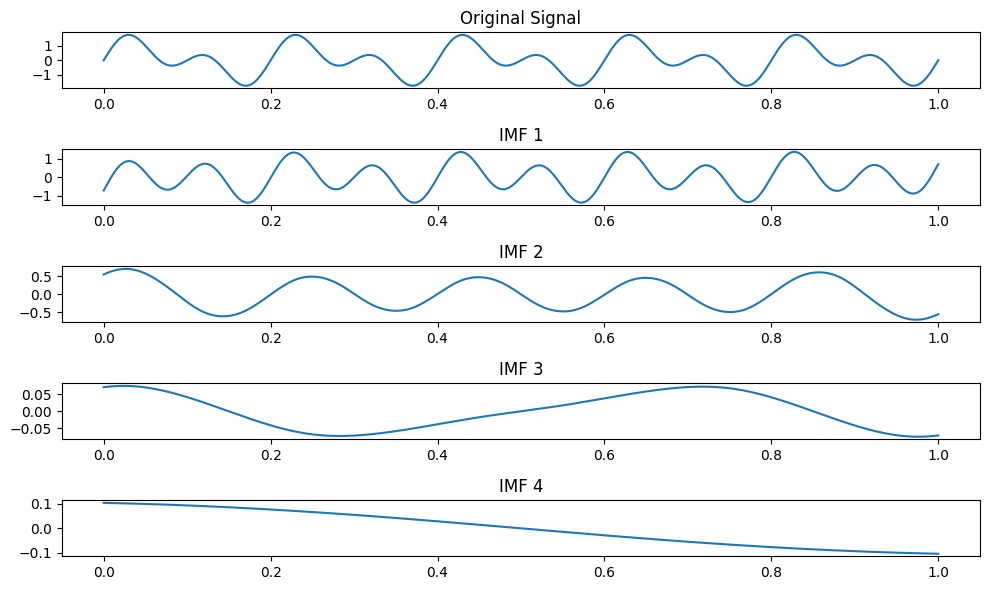

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PyEMD
from PyEMD import EMD

# Generate a sample signal
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 10 * t)

# Perform Empirical Mode Decomposition
emd = EMD()
imfs = emd(signal)

# Plot the original signal and its intrinsic mode functions (IMFs)
plt.figure(figsize=(10, 6))

plt.subplot(len(imfs) + 1, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')

for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 2)
    plt.plot(t, imf, label=f'IMF {i+1}')
    plt.title(f'IMF {i+1}')

plt.tight_layout()
plt.show()


In [ ]:
# Select only numeric columns
x = torch.tensor(normalized_df.values, dtype=torch.float32).T
A = adjacency_matrix
G = sp.coo_matrix(A)
edge_index = torch.tensor(np.array([G.row, G.col]), dtype=torch.int64)
edge_weight = torch.tensor(G.data).float()
torch.max(x)

tensor(100.)

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
from scipy.stats import linregress

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)

    self.conv1 = nn.Linear(260, 130)
    self.conv2 = nn.Linear(130, 65)
    self.conv3 = nn.Linear(65, 130)
    self.conv4 = nn.Linear(130, 260)


    self.conv5 = nn.Linear(260, 130)
    self.conv6 = nn.Linear(130, 65)
    self.conv7 = nn.Linear(65, 130)
    self.conv8 = nn.Linear(130, 260)


  def forward(self, x, edge_index):
    h_1 = self.conv1(x)
    h_2 = self.conv2(h_1)
    h_3 = self.conv3(h_2)
    h_a = self.conv4(h_3)

    h_5 = self.conv5(x)
    h_6 = self.conv6(h_5)
    h_7 = self.conv7(h_6)
    h_f = self.conv8(h_7)


    return h_a, h_f

model = GCN()
print(model)

GCN(
  (conv1): Linear(in_features=260, out_features=130, bias=True)
  (conv2): Linear(in_features=130, out_features=65, bias=True)
  (conv3): Linear(in_features=65, out_features=130, bias=True)
  (conv4): Linear(in_features=130, out_features=260, bias=True)
  (conv5): Linear(in_features=260, out_features=130, bias=True)
  (conv6): Linear(in_features=130, out_features=65, bias=True)
  (conv7): Linear(in_features=65, out_features=130, bias=True)
  (conv8): Linear(in_features=130, out_features=260, bias=True)
)


In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
from scipy.stats import linregress

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)

    self.conv1 = GATConv(60, 30)
    self.conv2 = GATConv(30, 15)
    self.conv3 = GATConv(15, 30)
    self.conv4 = GATConv(30, 60)

    self.conv5 = GATConv(60, 30)
    self.conv6 = GATConv(30, 15)
    self.conv7 = GATConv(15, 30)
    self.conv8 = GATConv(30, 60)


  def forward(self, x, edge_index):


    h_1 = self.conv1(x, edge_index)
    h_2 = self.conv2(h_1, edge_index)
    h_3 = self.conv3(h_2, edge_index)
    h_a = self.conv4(h_3, edge_index)



    h_5 = self.conv5(x, edge_index)
    h_6 = self.conv6(h_5, edge_index)
    h_7 = self.conv7(h_6, edge_index)
    h_f = self.conv8(h_7, edge_index)

    return h_a, h_f

model = GCN()
print(model)

GCN(
  (conv1): GATConv(60, 30, heads=1)
  (conv2): GATConv(30, 15, heads=1)
  (conv3): GATConv(15, 30, heads=1)
  (conv4): GATConv(30, 60, heads=1)
  (conv5): GATConv(60, 30, heads=1)
  (conv6): GATConv(30, 15, heads=1)
  (conv7): GATConv(15, 30, heads=1)
  (conv8): GATConv(30, 60, heads=1)
)


In [ ]:
from sklearn.metrics import mean_squared_error
import torch
import tensorflow as tf
import torch.nn.functional as F

Lambda1 = 0
Lambda2 = 100
Lambda3 = 1

# Lambda1 = 0
# Lambda2 = 0
# Lambda3 = 1

m1 = [[1] for i in range(1,61)]
m2 = [[i] for i in range(1,61)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

K = 12
d = [ [ 0 for y in range(60) ] for x in range(5) ]
for i in range(5):
  for j in range(60):
    if int(j/K) == i:
      d[i][j] = 1/K
E = torch.as_tensor(d)

W = [ [ 1 for y in range(5) ] for x in range(5) ]
for i in range(5):
  for j in range(5):
    W[i][j] = np.abs(j-i)
W = torch.as_tensor(W)
W = W.fill_diagonal_(1)


I = [ 1 for x in range(5) ]
I = torch.as_tensor(I)
L = torch.diag(torch.matmul(W, I), 0) - W

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay= 0.02)


def train(x, edge_index, Lambda1, Lambda2):
  optimizer.zero_grad()
  h_a, h_f = model(x, edge_index)
  # loss = criterion(h_a+h_f, x)
  print(h_a.shape)
  loss = criterion(h_a+h_f, x)  + \
  10*torch.std(torch.diff(h_a)) +\
  Lambda1 * torch.var(h_a) +\
  Lambda2 * torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])) +\
  Lambda3 * torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0))

  print(criterion(h_a+h_f, x))
  print(torch.std(torch.diff(h_a)))
  print(torch.var(h_a))
  print(torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])))
  print(torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)))

  loss.backward()
  optimizer.step()
  return loss, criterion(h_a+h_f, x), h_a, h_f

epochs = range(1, 300)
losses = []
embeddings = []
min_loss = 1000
for epoch in epochs:
  loss, loss_2, h_a, h_f= train(x, edge_index, Lambda1, Lambda2)
  losses.append(loss)
  print(f"Epoch: {epoch}\tLoss: {loss:.4f}")
  # if loss < 5000:
  #   break


torch.Size([14, 60])
tensor(4610.0474, grad_fn=<MseLossBackward0>)
tensor(36.1015, grad_fn=<StdBackward0>)
tensor(688.6821, grad_fn=<VarBackward0>)
tensor(2.9464, grad_fn=<SumBackward0>)
tensor(126444)
Epoch: 1	Loss: 131709.7031
torch.Size([14, 60])
tensor(2109.7432, grad_fn=<MseLossBackward0>)
tensor(26.4494, grad_fn=<StdBackward0>)
tensor(279.7119, grad_fn=<VarBackward0>)
tensor(5.1080, grad_fn=<SumBackward0>)
tensor(34710)
Epoch: 2	Loss: 37595.0391
torch.Size([14, 60])
tensor(1433.7188, grad_fn=<MseLossBackward0>)
tensor(22.5652, grad_fn=<StdBackward0>)
tensor(239.6318, grad_fn=<VarBackward0>)
tensor(4.0884, grad_fn=<SumBackward0>)
tensor(21239)
Epoch: 3	Loss: 23307.2051
torch.Size([14, 60])
tensor(1295.5314, grad_fn=<MseLossBackward0>)
tensor(25.9206, grad_fn=<StdBackward0>)
tensor(377.2031, grad_fn=<VarBackward0>)
tensor(0.3733, grad_fn=<SumBackward0>)
tensor(8523)
Epoch: 4	Loss: 10115.0693
torch.Size([14, 60])
tensor(1286.0853, grad_fn=<MseLossBackward0>)
tensor(28.4902, grad_fn=

In [ ]:
torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)

tensor([ 526,  651, 2739,  650, 4412, 1566,  387, 1119,  239, 1566,  242, 3856,
         210, 2306,  167,  554, 2134,  543,  451, 2520,   48,  127, 1059,  391,
        2479,   43,   27,  526, 3026, 1912,  523,  339, 3256,  787,  447,  586,
        2059, 1042, 4316, 2451,  650, 4602,  684, 1143,  987,  975,  776,  252,
        1826, 2695])

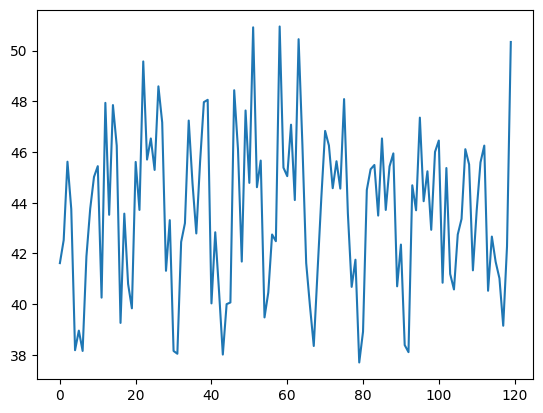

In [ ]:
plt.plot((h_f[0]+torch.mean(h_a[0])).detach().numpy())

In [ ]:
torch.nn.functional.avg_pool1d(h_a, kernel_size = 3, stride=1, padding = 3 // 2)

tensor([[28.7090, 43.1678, 42.5939,  ..., 38.7506, 39.5236, 26.8918],
        [28.7090, 43.1678, 42.5939,  ..., 38.7506, 39.5236, 26.8918],
        [28.7090, 43.1678, 42.5939,  ..., 38.7506, 39.5236, 26.8918],
        ...,
        [26.4827, 39.8734, 39.6548,  ..., 37.1774, 37.7261, 25.3660],
        [26.4827, 39.8734, 39.6548,  ..., 37.1774, 37.7261, 25.3661],
        [26.4827, 39.8735, 39.6548,  ..., 37.1774, 37.7261, 25.3660]],
       grad_fn=<SqueezeBackward1>)

In [ ]:
h_a

tensor([[43.2326, 42.8943, 43.3765,  ..., 37.8955, 40.5911, 40.0843],
        [43.2326, 42.8943, 43.3765,  ..., 37.8955, 40.5911, 40.0843],
        [43.2326, 42.8943, 43.3765,  ..., 37.8955, 40.5911, 40.0843],
        ...,
        [39.7900, 39.6582, 40.1722,  ..., 37.0802, 38.3499, 37.7483],
        [39.7900, 39.6582, 40.1722,  ..., 37.0803, 38.3499, 37.7483],
        [39.7900, 39.6582, 40.1722,  ..., 37.0802, 38.3499, 37.7483]],
       grad_fn=<SqueezeBackward1>)

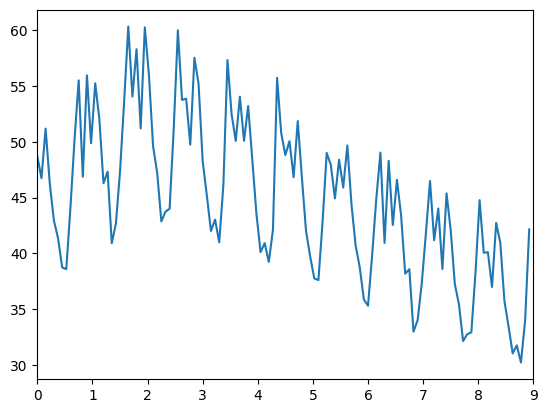

In [ ]:
# L = [[i] for i in np.range(0,10,1/12)]
L = np.arange(0, 9, 3/40)
plt.plot(L, x[10].detach().numpy())
plt.margins(x=0)
plt.xticks(np.arange(0, 10, 1))
plt.savefig("gdrive/My Drive/Wavelet_GNN_PLR/V10_raw.png",transparent=True, dpi=1000)
# plt.plot((h_a[15]).detach().numpy())

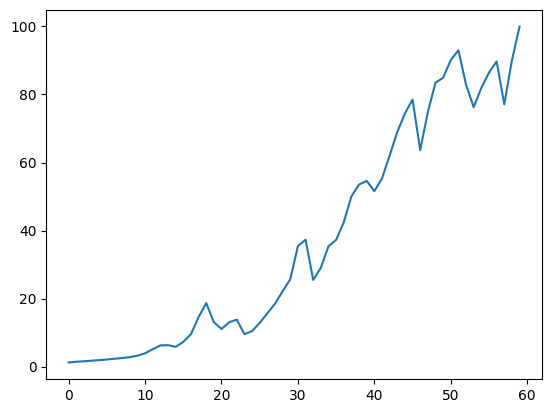

In [ ]:
plt.plot((x[10]).detach().numpy())

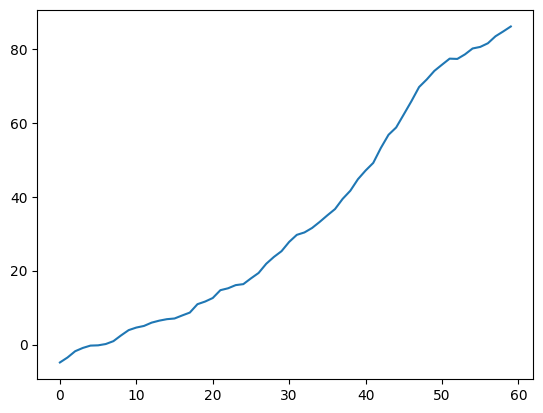

In [ ]:
plt.plot((h_a[10]).detach().numpy())

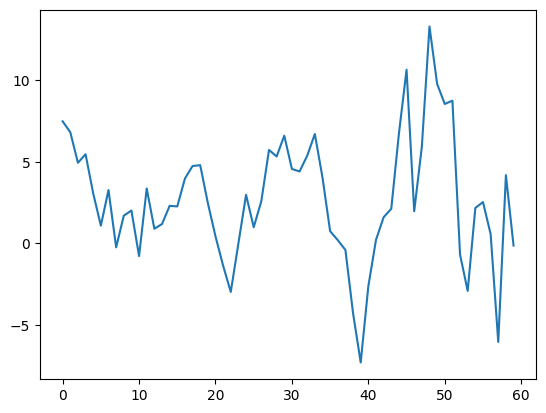

In [ ]:
plt.plot((h_f[10]).detach().numpy())

In [ ]:
normalized_df.shape

(60, 14)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PyEMD
from PyEMD import EMD



t = np.linspace(0, 59, 60)

# # Perform Empirical Mode Decomposition
# emd = EMD()
# imfs = emd(normalized_df.iloc[:,0].values)

# # Plot the original signal and its intrinsic mode functions (IMFs)
# plt.figure(figsize=(10, 6))
# # Trend (Residual)
# trend = imfs[-1]
# plt.plot(t, trend, label='trend')
# plt.show()


num_rows = 60
num_columns = 14

# Create a DataFrame filled with zeros
RDP = pd.DataFrame(0, index=range(num_rows), columns=range(num_columns))


for i in range(14):
  emd = EMD()
  imfs = emd(normalized_df.iloc[:,i].values)
  trend = imfs[-1]
  RDP.iloc[:,i] = trend

RDP



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.640283,0.475065,2.135306,0.289045,5.975600,1.317792,1.572582,-1.953675,-0.819912,-14.613898,3.051271,1.028227,2.544923,2.553640
1,2.600981,0.535407,2.169876,0.323154,6.001192,1.843613,1.580652,-2.246600,-1.101856,-14.783589,3.012512,1.061737,2.698368,2.648257
2,2.625597,0.684811,2.277750,0.360479,6.096575,2.363922,1.569777,-2.316781,-1.229821,-14.716226,3.019065,1.162401,2.912865,2.812891
3,2.715972,0.922304,2.445248,0.391919,6.263843,2.884865,1.530364,-2.166232,-1.195773,-14.410257,3.069316,1.331369,3.163210,3.032246
4,2.873946,1.244607,2.665400,0.411754,6.505093,3.412588,1.497635,-1.808468,-0.991674,-13.870470,3.163488,1.568175,3.424190,3.297019
5,3.101357,1.642764,2.958017,0.427779,6.822424,3.953239,1.508225,-1.264365,-0.609507,-13.110674,3.302264,1.864933,3.679770,3.621863
6,3.400045,2.106400,3.349609,0.450588,7.217932,4.512955,1.596154,-0.557289,-0.041231,-12.146838,3.486330,2.208361,3.950731,4.027425
7,3.771850,2.625139,3.866691,0.489817,7.693716,5.097882,1.782047,0.292016,0.720418,-10.994919,3.716368,2.584232,4.265020,4.533838
8,4.216394,3.188608,4.530969,0.557030,8.251869,5.714174,2.032929,1.277613,1.679603,-9.670883,3.993064,2.978318,4.639300,5.159189
9,4.724427,3.786431,5.344932,0.650607,8.894492,6.367968,2.302429,2.397633,2.839741,-8.190690,4.317100,3.376393,5.071896,5.921055


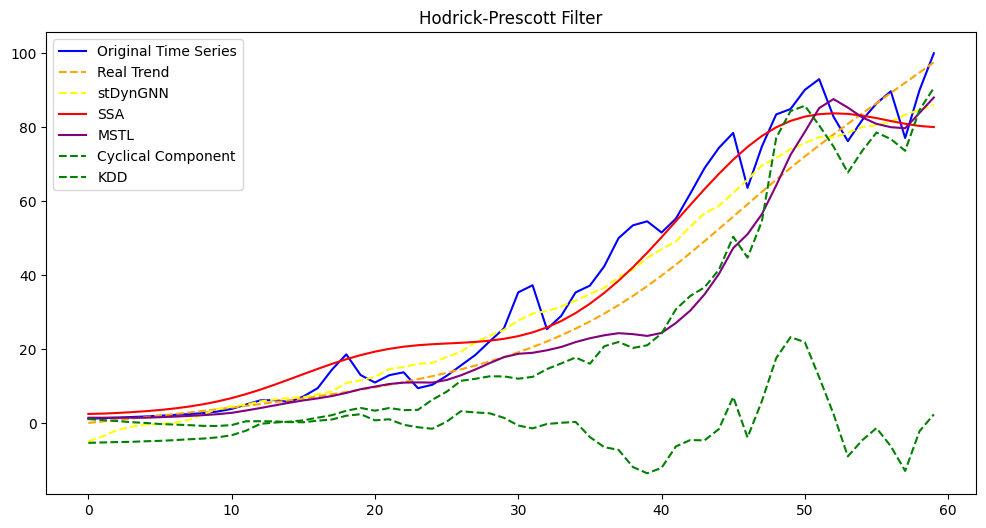

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Corrected sample time series data
# Ensure that the 'Value' array has the same length as the date range
# data = {
#     'Date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
#     'Value': np.linspace(10, 250, 100) + np.random.normal(scale=5, size=100),
# }

# df = pd.DataFrame(data)
# df.set_index('Date', inplace=True)

# Apply Hodrick-Prescott filter
cycle, trend = sm.tsa.filters.hpfilter(normalized_df.iloc[:,0])

# Plot the original and filtered time series
plt.figure(figsize=(12, 6))
plt.plot(t, normalized_df.iloc[:,10], label='Original Time Series', linestyle='-', color='blue')
plt.plot(t, trend, label='Real Trend', linestyle='--', color='orange')
plt.plot(t, h_a[10].detach().numpy(), label='stDynGNN', linestyle='--', color='yellow')
plt.plot(t, imfs[-1], label='SSA', color='red')
plt.plot(t, MSTL_df.iloc[:,0], label='MSTL', color='purple')
plt.plot(t, cycle, label='Cyclical Component', linestyle='--', color='green')
plt.plot(t, PLR_KDD.iloc[:,0], label='KDD', linestyle='--', color='green')
plt.title('Hodrick-Prescott Filter')
plt.legend()
plt.show()



In [ ]:
MSTL_df.iloc[:,0]

0       0.896209
1       0.896209
2       0.896209
3       0.896209
4       0.896209
         ...    
255    85.141847
256    86.015675
257    87.432246
258    88.653053
259    90.189671
Name: 0, Length: 260, dtype: float64

In [ ]:
Error = []
for i in range(14):
  Error.append(np.linalg.norm(RDP.iloc[40:, i].values/100 - MSTL_df.iloc[40:, i]/100, axis=0))
error = np.mean(Error)

from sklearn.metrics import mean_absolute_error as mae

y_true, y_pred = np.array(RDP.iloc[40:,:]), np.array(MSTL_df.iloc[40:,:])

print("ED: "+ str(error))
print("MAPE: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

ED: 0.34867765064527145
MAPE: 10.699403247648343%


In [ ]:
Error = []
for i in range(14):
  Error.append(np.linalg.norm(RDP.iloc[40:, i].values/100 - PLR_KDD.iloc[40:, i]/100, axis=0))
error = np.mean(Error)

from sklearn.metrics import mean_absolute_error as mae

y_true, y_pred = np.array(RDP.iloc[40:,:]), np.array(PLR_KDD.iloc[40:,:])

print("ED: "+ str(error))
print("MAPE: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

ED: 0.4554003215828762
MAPE: 13.167813872222537%


In [ ]:
ssa_df.shape

(56, 14)

In [ ]:
Error = []
for i in range(14):
  Error.append(np.linalg.norm(RDP.iloc[40:, i].values/100 - ssa_df.iloc[40:, i]/100, axis=0))
error = np.mean(Error)

from sklearn.metrics import mean_absolute_error as mae

y_true, y_pred = np.array(RDP.iloc[40:,:]), np.array(ssa_df.iloc[40:,:])

print("ED: "+ str(error))
print("MAPE: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")


ED: 0.5734072550294386
MAPE: 17.37408840046985%


In [ ]:
Error = []
for i in range(14):
  Error.append(np.linalg.norm(RDP.iloc[40::, i].values/100 - h_a.T.detach().numpy()[40::, i]/100, axis=0))
error = np.mean(Error)

from sklearn.metrics import mean_absolute_error as mae

y_true, y_pred = np.array(RDP.iloc[40:,:]), np.array(h_a.T.detach().numpy()[40:,:])

print("ED: "+ str(error))
print("MAPE: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

ED: 0.3058809594274408
MAPE: 9.308820733256818%


In [ ]:
Error = []
for i in range(14):
  Error.append(np.linalg.norm(RDP.iloc[40:, i].values/100 - h_a.T.detach().numpy()[40:, i]/100, axis=0))
error = np.mean(Error)

from sklearn.metrics import mean_absolute_error as mae

y_true, y_pred = np.array(RDP.iloc[40:,:]), np.array(h_a.T.detach().numpy()[40:,:])

print("ED: "+ str(error))
print("MAPE: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

ED: 0.3501428695750719
MAPE: 9.495343710379963%


In [ ]:
Error = []
for i in range(14):
  Error.append(np.linalg.norm(RDP.iloc[40:, i].values/100 - h_a.T.detach().numpy()[40:, i]/100, axis=0))
error = np.mean(Error)

from sklearn.metrics import mean_absolute_error as mae

y_true, y_pred = np.array(RDP.iloc[40:,:]), np.array(h_a.T.detach().numpy()[40:,:])

print("ED: "+ str(error))
print("MAPE: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

ED: 0.3504740627515516
MAPE: 10.534991687001485%


In [ ]:
Error = []
for i in range(50):
  Error.append(np.linalg.norm(RDP - h_a.T.detach().numpy(), axis=0))
np.mean(Error)

# from sklearn.metrics import mean_absolute_error as mae

# error = mae(trend/100, h_a.T.detach().numpy()/100)
# y_true, y_pred = np.array(trend/100), np.array(h_a.T.detach().numpy()/100)

# print("ED: "+ str(error))
# print("MAPE: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

161.57085733094908

In [ ]:
# np.linalg.norm(RDP.iloc[:, [1]].values - EDP_norm.iloc[:, [1]], axis=0)
Error = []
for i in range(50):
  Error.append(np.linalg.norm(RDP- MSTL_df, axis=0))
np.mean(Error)

from sklearn.metrics import mean_absolute_error as mae

error = mae(RDP/100, MSTL_df/100)
y_true, y_pred = np.array(RDP/100), np.array(MSTL_df/100)

print("ED: "+ str(error))
print("MAPE: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

ED: 0.0985545566522907
MAPE: 24.47356274846946%


In [ ]:
MSTL_df.iloc[:,0].isna().sum()

1

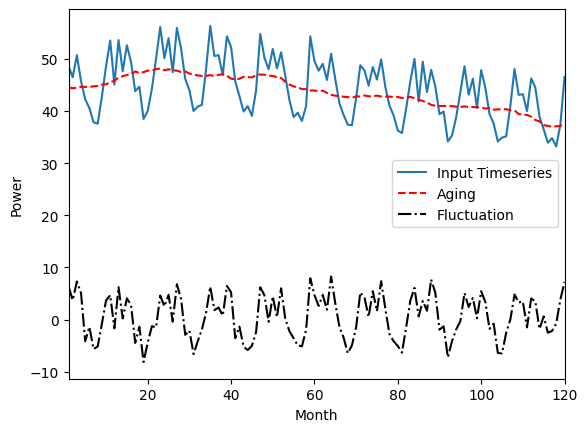

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
L = [[i] for i in range(1,121)]

# plot lines
plt.plot(L, x[1].detach().numpy(), label = "Input Timeseries", linestyle="-")
plt.plot(L, h_a[1].detach().numpy(), label = "Aging", linestyle="--", color = 'red')
plt.plot(L, h_f[1].detach().numpy(), label = "Fluctuation", linestyle="-.", color = 'black')
plt.legend()
plt.margins(x=0)
plt.xlabel('Month')
plt.ylabel('Power')
# plt.savefig("gdrive/My Drive/Wavelet_GNN_PLR/V15_aging_fluctuation.png",transparent=True, dpi=1000)
plt.show()

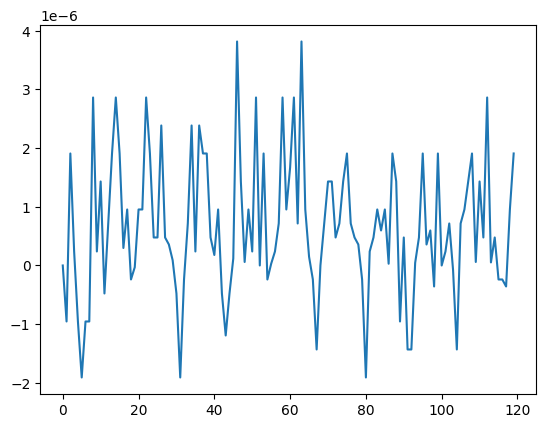

In [ ]:
plt.plot((h_f[10]-h_f[0]).detach().numpy())

In [ ]:
# torch.var(x[0]-h_f[0])
torch.var(h_a[0])

tensor(9.5837, grad_fn=<VarBackward0>)

In [ ]:
m1 = [[1] for i in range(1,121)]
m2 = [[i] for i in range(1,121)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

PLR_calc = torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_a, 0, 1))
PLR_calc

tensor([[49.1106, 49.1106, 49.1106, 49.1106, 49.1106, 49.1106, 49.1106, 49.1106,
         49.1106, 49.1106, 49.1106, 49.1106, 49.1106, 49.1106, 49.1106, 49.1106,
         49.1106, 49.1106, 49.1106, 49.1106, 44.4268, 44.4268, 44.4268, 44.4268,
         44.4268, 44.4268, 44.4268, 44.4268, 44.4268, 44.4268, 44.4268, 44.4268,
         44.4268, 44.4268, 44.4268, 44.4268, 44.4268, 44.4268, 44.4268, 44.4268,
         46.6451, 46.6196, 46.5712, 46.6451, 46.6451, 46.4783, 46.5950, 46.5258,
         46.6196, 46.6451, 46.6451, 46.6451, 46.6451, 46.5481, 46.6451, 46.6196,
         46.6196, 46.6196, 46.5258, 46.6451, 44.4268, 44.4268, 44.4268, 44.4268,
         44.4268, 44.6470, 45.1204, 44.4268, 44.4268, 44.4972, 44.4268, 44.7141,
         44.8441, 44.4268, 44.4268, 44.4268, 44.4268, 44.7804, 44.4268, 44.4972,
         45.8827, 45.8827, 45.8827, 45.8827, 45.8827, 45.8827, 45.8827, 45.8827,
         45.8827, 45.8827, 45.8827, 45.8827, 45.8827, 45.8827, 45.8827, 45.8827,
         45.8827, 45.8827, 4

In [ ]:
model = GCN()
model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case2__linear_breakpoint_best_model.pt')
model.load_state_dict(torch.load(model_save_path))
model.eval()
h_a, h_f = model(x, edge_index)



PLR_matrix = (x-h_f).T
PLR_matrix.shape

torch.Size([120, 100])

In [ ]:
model = GCN()
model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case2__linear_breakpoint_best_model_v2_No_Flatness.pt')
model.load_state_dict(torch.load(model_save_path))
model.eval()
h_a, h_f = model(x, edge_index)

PLR_matrix = (x-h_f).T
PLR_matrix.shape

torch.Size([120, 100])

In [ ]:
PLR_dense = torch.FloatTensor(10, 100)
PLR_matrix = (x-h_f).T
PLR_matrix.shape

for j in range(100):
  PLR_inverter = []
  for i in range(10):
    PLR_dense[i][j] = torch.mean(PLR_matrix[12*i:12*(i+1),j])

PLR_dense

tensor([[45.0226, 45.1818, 45.3096, 45.3325, 44.9785, 45.2873, 45.4525, 45.4878,
         45.4674, 45.7078, 46.1338, 46.5474, 45.4140, 45.0677, 44.9625, 45.0961,
         44.9874, 44.9442, 44.8566, 44.7166, 39.7435, 39.8491, 39.8584, 40.2638,
         39.9258, 39.6321, 39.6105, 39.7069, 39.8227, 39.8742, 40.1678, 39.6610,
         39.6644, 39.6174, 39.8440, 39.6366, 39.6357, 39.7055, 39.7525, 39.5964,
         42.2122, 42.1173, 42.0173, 42.1617, 42.0266, 42.0089, 42.0448, 42.0112,
         41.9709, 41.9682, 41.9600, 41.9672, 41.9853, 42.0525, 42.0286, 42.0216,
         42.0229, 42.0218, 42.0983, 42.0441, 41.8348, 41.5738, 42.1261, 42.3318,
         42.9447, 41.9355, 41.7222, 41.5832, 40.9498, 41.0080, 40.9104, 40.9025,
         40.8840, 40.6363, 40.7187, 40.7426, 40.9414, 41.0809, 41.0785, 40.8513,
         42.4315, 42.1821, 41.9722, 41.9113, 41.9274, 41.9795, 42.0459, 42.0959,
         41.7394, 41.6833, 41.6383, 41.6161, 41.5896, 41.6406, 41.6585, 41.6910,
         41.6078, 41.6141, 4

In [ ]:
m1 = [[1] for i in range(1,11)]
m2 = [[i] for i in range(1,11)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

PLR_calc = torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(PLR_dense.T, 0, 1))
PLR_calc

tensor([[47.9638, 48.6398, 49.1895, 49.2843, 47.7750, 49.0908, 49.8016, 49.9604,
         49.8617, 50.8908, 52.7127, 54.4784, 49.6427, 48.1553, 47.7047, 48.2739,
         47.8136, 47.6260, 47.2498, 46.6542, 41.6385, 42.0925, 42.1364, 43.8733,
         42.4244, 41.1590, 41.0690, 41.4800, 41.9795, 42.2038, 43.4625, 41.2782,
         41.2993, 41.0920, 42.0726, 41.1739, 41.1774, 41.4767, 41.6745, 41.0065,
         43.3495, 42.9380, 42.4455, 42.5488, 42.5477, 42.4677, 42.6234, 42.4812,
         42.2408, 42.2942, 42.2596, 42.2931, 42.3664, 42.6646, 42.4908, 42.5218,
         42.4679, 42.4633, 42.5725, 42.6215, 47.1930, 46.1059, 48.4424, 49.2793,
         51.8645, 47.6444, 46.7166, 46.1443, 43.4862, 43.7137, 43.3230, 43.3702,
         43.2215, 42.1555, 42.5143, 42.6128, 43.4545, 44.0221, 44.0183, 43.0860,
         44.9637, 43.9019, 43.0168, 42.7564, 42.8220, 43.0465, 43.3294, 43.5426,
         42.0232, 41.7893, 41.5981, 41.5030, 41.3909, 41.6062, 41.6850, 41.8195,
         41.4659, 41.4953, 4

In [ ]:
PLR_calc.shape
PLR_derived = []

for i in range(100):
  P = (PLR_calc[0][i] + 10*PLR_calc[1][i] - PLR_calc[0][i])/ (PLR_calc[0][i]*10)
  PLR_derived.append(P.detach().numpy())


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(output_PLR, PLR_derived)
y_true, y_pred = np.array(output_PLR), np.array(PLR_derived)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.0046433553627312244
PLR MAPE of 100 simulated inverters is: 32.6872026907912%


In [ ]:
# model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case2__linear_breakpoint_best_model_v2_No_Flatness.pt')
# torch.save(model.state_dict(), model_save_path)

In [ ]:
output_PLR = [((1-4*value)*(1+8*value)-1)/10 for value in PLR]
output = [(1-2*value*2)*(1+8*value) for value in PLR]
output_PLR

[-0.015016863407392,
 -0.014581208439072003,
 -0.013836959491199997,
 -0.02254438829260801,
 -0.016892119199872,
 -0.024461151202431995,
 -0.024054875289888,
 -0.026482048276992,
 -0.034333545343488,
 -0.027755641702432,
 -0.024391919710751987,
 -0.013322977363072008,
 -0.010504001863200007,
 -0.009546393628799998,
 -0.011112961670271992,
 -0.009917083086112,
 -0.00921225755699201,
 -0.009508905503232001,
 -0.008283400230912008,
 -0.013138585606431996,
 -0.009844345100799989,
 -0.009452786136192003,
 -0.007422338402847994,
 -0.008166586255872011,
 -0.010984490952832004,
 -0.006764417632800013,
 -0.008485196071967993,
 -0.011248729292799997,
 -0.010556776082208008,
 -0.009413312174112,
 -0.010280224011552009,
 -0.008583939971199994,
 -0.006800933020800004,
 -0.006481671436800007,
 -0.007299112157472009,
 -0.007772247955968014,
 -0.009265482420000004,
 -0.01124283024412801,
 -0.010641547418111996,
 -0.00896120715519999,
 -0.005551444705312003,
 -0.006989472364672,
 -0.00553721922,
 -0.00

### Compare shape of EDP (esimtated degradation pattern) and RDP

In [ ]:
import pandas as pd

RDP = pd.DataFrame()
index = list(range(0, 87601,720))[:120]

# def plr_linear_scale(scale, plr, sample_rate =24):
#   return (1 - (scale * (plr) / (365* sample_rate)))

def plr_pw_scale(scale, plr, seg_len, sample_rate =24):
  if scale < seg_len + 1:
    return  (1 - (scale * -2 * (plr) / (365* sample_rate)))
  else:
    return  ((1 - ((-3 * seg_len * plr) / (365* sample_rate))) - (scale * (plr) / (365* sample_rate)))

index = range(0, 87601,720)

for j in range(100):
  for i in range(120):
    RDP.loc[i,j] = plr_pw_scale(index[i], -PLR[j], 24*365*2, 24)

RDP = RDP.groupby(np.arange(len(RDP.index))//12).mean()
first_row = RDP.iloc[0]
RDP = RDP.divide(first_row, axis=1)
RDP

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.044200,1.051187,1.056840,1.057812,1.042225,1.055815,1.063095,1.064718,1.063700,1.074137,...,1.010764,1.009673,1.008392,1.010855,1.011761,1.013290,1.009252,1.009580,1.011799,1.009199
2,1.059701,1.069138,1.076774,1.078087,1.057033,1.075389,1.085222,1.087414,1.086039,1.100136,...,1.014539,1.013065,1.011336,1.014662,1.015885,1.017951,1.012497,1.012939,1.015936,1.012424
3,1.037754,1.043722,1.048551,1.049381,1.036067,1.047675,1.053894,1.055280,1.054411,1.063325,...,1.009194,1.008262,1.007168,1.009272,1.010046,1.011352,1.007903,1.008183,1.010078,1.007857
4,1.015654,1.018129,1.020131,1.020475,1.014955,1.019768,1.022346,1.022921,1.022560,1.026257,...,1.003812,1.003426,1.002972,1.003845,1.004165,1.004707,1.003277,1.003393,1.004179,1.003258
5,0.993554,0.992535,0.991711,0.991569,0.993842,0.991860,0.990799,0.990562,0.990710,0.989188,...,0.998430,0.998589,0.998776,0.998417,0.998285,0.998062,0.998651,0.998603,0.998279,0.998659
6,0.971454,0.966942,0.963291,0.962663,0.972730,0.963953,0.959251,0.958203,0.958860,0.952120,...,0.993048,0.993753,0.994580,0.992989,0.992404,0.991417,0.994025,0.993813,0.992380,0.994059
7,0.949354,0.941348,0.934871,0.933757,0.951617,0.936046,0.927704,0.925844,0.927010,0.915052,...,0.987666,0.988917,0.990384,0.987562,0.986524,0.984771,0.989398,0.989023,0.986481,0.989460
8,0.927254,0.915754,0.906451,0.904850,0.930505,0.908138,0.896156,0.893485,0.895160,0.877983,...,0.982284,0.984081,0.986188,0.982134,0.980644,0.978126,0.984772,0.984233,0.980581,0.984861
9,0.905154,0.890161,0.878031,0.875944,0.909392,0.880231,0.864609,0.861126,0.863310,0.840915,...,0.976902,0.979244,0.981991,0.976706,0.974763,0.971481,0.980146,0.979444,0.974682,0.980261


In [ ]:
EDP = pd.DataFrame(PLR_matrix.detach().numpy())
first_row = EDP.iloc[0]
EDP = EDP.divide(first_row, axis=1)
EDP = EDP.groupby(np.arange(len(EDP.index))//12).mean()
first_row = EDP.iloc[0]
EDP = EDP.divide(first_row, axis=1)
EDP

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.063495,1.070418,1.076039,1.076951,1.061544,1.074998,1.082258,1.083892,1.082815,1.093204,...,1.019404,1.018298,1.017043,1.019493,1.020404,1.021866,1.017872,1.018222,1.020412,1.017823
2,1.073622,1.082539,1.089828,1.091095,1.071098,1.088514,1.097894,1.100021,1.098662,1.112038,...,1.027207,1.025837,1.024204,1.027344,1.028518,1.030461,1.025283,1.025722,1.028537,1.025201
3,1.052846,1.058317,1.062788,1.063505,1.051324,1.061932,1.067652,1.069016,1.068142,1.076325,...,1.018610,1.017789,1.016738,1.018666,1.019389,1.020582,1.017396,1.017715,1.019389,1.017379
4,1.040363,1.042360,1.043965,1.044293,1.039807,1.043719,1.045788,1.046363,1.045981,1.048974,...,1.019928,1.019621,1.019243,1.019944,1.020201,1.020661,1.019509,1.019614,1.020192,1.019449
5,0.986962,0.985562,0.984534,0.984314,0.987348,0.984676,0.983297,0.983031,0.983132,0.981131,...,0.997676,0.997924,0.998158,0.997685,0.997490,0.997131,0.998037,0.997922,0.997438,0.998028
6,0.983773,0.978845,0.974860,0.974211,0.985132,0.975565,0.970458,0.969426,0.970005,0.962734,...,1.007109,1.007883,1.008795,1.007085,1.006448,1.005314,1.008209,1.007969,1.006356,1.008211
7,0.961188,0.952815,0.946058,0.944902,0.963571,0.947257,0.938563,0.936668,0.937804,0.925354,...,1.002340,1.003667,1.005194,1.002263,1.001152,0.999312,1.004137,1.003732,1.001094,1.004209
8,0.933850,0.922052,0.912503,0.910883,0.937161,0.914208,0.901942,0.899273,0.900913,0.883364,...,0.979357,0.981215,0.983342,0.979218,0.977736,0.975109,0.981896,0.981327,0.977651,0.981984
9,0.903257,0.888020,0.875728,0.873606,0.907534,0.877921,0.862133,0.858637,0.860798,0.838135,...,0.972025,0.974418,0.977193,0.971851,0.969871,0.966524,0.975347,0.974621,0.969787,0.975463


In [ ]:
EDP_NF = pd.DataFrame(PLR_matrix.detach().numpy())
first_row = EDP_NF.iloc[0]
EDP_NF = EDP_NF.divide(first_row, axis=1)
EDP_NF = EDP_NF.groupby(np.arange(len(EDP_NF.index))//12).mean()
first_row = EDP_NF.iloc[0]
EDP_NF = EDP_NF.divide(first_row, axis=1)
EDP_NF

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.053910,1.060961,1.066684,1.067614,1.051923,1.065625,1.073017,1.074680,1.073585,1.084163,...,1.007826,1.006694,1.005408,1.007917,1.008850,1.010349,1.006257,1.006615,1.008859,1.006207
2,1.041980,1.051130,1.058607,1.059907,1.039390,1.057260,1.066881,1.069062,1.067670,1.081391,...,1.002105,1.000697,0.999017,1.002247,1.003453,1.005452,1.000127,1.000578,1.003474,1.000043
3,1.009887,1.015586,1.020239,1.020988,1.008302,1.019351,1.025305,1.026720,1.025815,1.034333,...,0.996506,0.995658,0.994574,0.996564,0.997310,0.998543,0.995253,0.995581,0.997311,0.995236
4,0.989834,0.992040,0.993810,0.994168,0.989221,0.993536,0.995817,0.996439,0.996030,0.999329,...,0.991967,0.991640,0.991236,0.991985,0.992259,0.992750,0.991520,0.991631,0.992251,0.991458
5,0.968781,0.967427,0.966437,0.966223,0.969154,0.966571,0.965241,0.964986,0.965080,0.963148,...,0.985715,0.985961,0.986192,0.985724,0.985531,0.985175,0.986074,0.985959,0.985479,0.986063
6,0.951356,0.946477,0.942530,0.941890,0.952701,0.943229,0.938172,0.937152,0.937724,0.930527,...,0.986844,0.987621,0.988537,0.986820,0.986180,0.985042,0.987949,0.987707,0.986088,0.987950
7,0.940821,0.932408,0.925618,0.924457,0.943217,0.926823,0.918087,0.916182,0.917325,0.904817,...,0.980833,0.982173,0.983715,0.980756,0.979634,0.977777,0.982648,0.982238,0.979576,0.982720
8,0.927949,0.916011,0.906351,0.904713,0.931299,0.908077,0.895667,0.892968,0.894627,0.876876,...,0.971723,0.973611,0.975772,0.971582,0.970076,0.967406,0.974303,0.973724,0.969990,0.974392
9,0.875432,0.860088,0.847711,0.845574,0.879740,0.849918,0.834021,0.830501,0.832677,0.809861,...,0.961214,0.963645,0.966465,0.961037,0.959026,0.955626,0.964590,0.963852,0.958941,0.964708


In [ ]:
EDP_NS = pd.DataFrame(PLR_matrix.detach().numpy())
first_row = EDP_NS.iloc[0]
EDP_NS = EDP_NS.divide(first_row, axis=1)
EDP_NS = EDP_NS.groupby(np.arange(len(EDP_NS.index))//12).mean()
first_row = EDP_NS.iloc[0]
EDP_NS = EDP_NS.divide(first_row, axis=1)
EDP_NS

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.064591,1.071613,1.077314,1.078239,1.062612,1.076259,1.083621,1.085278,1.084185,1.094720,...,1.018110,1.016992,1.015722,1.018200,1.019121,1.020600,1.016561,1.016914,1.019130,1.016511
2,1.067657,1.076728,1.084141,1.085430,1.065089,1.082805,1.092345,1.094508,1.093126,1.106728,...,1.018284,1.016895,1.015238,1.018423,1.019614,1.021584,1.016333,1.016778,1.019633,1.016250
3,1.044033,1.049617,1.054179,1.054911,1.042480,1.053306,1.059143,1.060533,1.059642,1.067991,...,1.004250,1.003412,1.002342,1.004308,1.005044,1.006261,1.003012,1.003337,1.005045,1.002995
4,1.025491,1.027572,1.029243,1.029583,1.024912,1.028986,1.031139,1.031734,1.031340,1.034455,...,0.997471,0.997150,0.996753,0.997489,0.997759,0.998241,0.997032,0.997142,0.997751,0.996971
5,0.994060,0.992613,0.991549,0.991322,0.994458,0.991697,0.990272,0.989997,0.990103,0.988035,...,1.006683,1.006938,1.007180,1.006691,1.006490,1.006119,1.007054,1.006937,1.006437,1.007044
6,0.968577,0.963631,0.959630,0.958979,0.969941,0.960338,0.955211,0.954176,0.954756,0.947460,...,0.991537,0.992310,0.993223,0.991513,0.990876,0.989742,0.992637,0.992397,0.990784,0.992638
7,0.948378,0.939927,0.933106,0.931940,0.950784,0.934317,0.925542,0.923629,0.924776,0.912213,...,0.987113,0.988446,0.989980,0.987035,0.985920,0.984072,0.988918,0.988511,0.985861,0.988990
8,0.933793,0.921818,0.912129,0.910485,0.937153,0.913860,0.901413,0.898705,0.900370,0.882565,...,0.980136,0.982015,0.984165,0.979996,0.978498,0.975842,0.982703,0.982128,0.978412,0.982792
9,0.907101,0.891624,0.879140,0.876984,0.911446,0.881366,0.865333,0.861783,0.863977,0.840964,...,0.976474,0.978894,0.981702,0.976297,0.974294,0.970908,0.979834,0.979100,0.974209,0.979952


In [ ]:
# np.linalg.norm(RDP.iloc[:, [1]].values - EDP_norm.iloc[:, [1]], axis=0)
Error = []
for i in range(100):
  Error.append(np.linalg.norm(RDP.iloc[:, [i]].values - EDP.iloc[:, [i]], axis=0))
np.mean(Error)

0.036219427953489994

In [ ]:
model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case2_Linear_W_BP_best_model_STGAE_NS.pt')

torch.save(model.state_dict(), model_save_path)

In [ ]:
# np.linalg.norm(RDP.iloc[:, [1]].values - EDP_norm.iloc[:, [1]], axis=0)
Error = []
for i in range(100):
  Error.append(np.linalg.norm(RDP.iloc[:, [i]].values - EDP.iloc[:, [i]], axis=0))
np.mean(Error)



0.03788278461638549

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(RDP, EDP)
y_true, y_pred = np.array(RDP), np.array(EDP)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.010086330860664142
PLR MAPE of 100 simulated inverters is: 1.0073021697523261%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(RDP, EDP)
y_true, y_pred = np.array(RDP), np.array(EDP)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.009483987550579753
PLR MAPE of 100 simulated inverters is: 0.9571404494112458%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(RDP, EDP)
y_true, y_pred = np.array(RDP), np.array(EDP)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.014393338183891522
PLR MAPE of 100 simulated inverters is: 1.4556712638614016%


In [ ]:
df_results_all = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/plr_aging_plot_df.csv', sep=',')
df_results_linear = df_results_all[(df_results_all['deg_shape']=='pw') & (df_results_all['model']=='correction')]
df_results_linear = df_results_linear.reset_index(drop=True)
# df_results_linear
PLR_list = df_results_linear['plr'].unique()

import pandas as pd

RDP = pd.DataFrame()
index = list(range(0, 87601,720))[:120]

# def plr_linear_scale(scale, plr, sample_rate =24):
#   return (1 - (scale * (plr) / (365* sample_rate)))

# for j in range(100):
#   for i in range(120):
# #     RDP.loc[i,j] = plr_linear_scale(index[i], PLR_list[j], 24)

def plr_pw_scale(scale, plr, seg_len, sample_rate =24):
  if scale < seg_len + 1:
    return  (1 - (scale * -2 * (plr) / (365* sample_rate)))
  else:
    return  ((1 - ((-3 * seg_len * plr) / (365* sample_rate))) - (scale * (plr) / (365* sample_rate)))

for j in range(100):
  for i in range(120):
    RDP.loc[i,j] = plr_pw_scale(index[i], PLR_list[j], 24*365*2, 24)

# index = range(0, 87601,720)
# index = index[:120]


# def plr_hyperbolic_scale(scale, plr, ts_yrs = 10, sample_rate = 24):
#   a_cons = ((1 / (1 - plr * ts_yrs)) - 1 )/ (365 * sample_rate * ts_yrs)
#   return (1 / (a_cons * scale + 1))


# for j in range(100):
#   for i in range(120):
#     RDP.loc[i,j] = plr_hyperbolic_scale(index[i], PLR_list[j],10,24)



RDP = RDP.groupby(np.arange(len(RDP.index))//12).mean()
first_row = RDP.iloc[0]
RDP = RDP.divide(first_row, axis=1)
RDP


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.061484,1.047408,1.041502,1.036755,1.030514,1.046178,1.044200,1.056840,1.055815,1.057812,...,1.044765,1.034346,1.046593,1.046083,1.033356,1.049938,1.035365,1.034083,1.047373,1.036544
2,1.083046,1.064034,1.056057,1.049645,1.041215,1.062372,1.059701,1.076774,1.075389,1.078087,...,1.060463,1.046391,1.062933,1.062244,1.045054,1.067451,1.047768,1.046036,1.063987,1.049360
3,1.052517,1.040494,1.035450,1.031395,1.026064,1.039444,1.037754,1.048551,1.047675,1.049381,...,1.038236,1.029337,1.039798,1.039363,1.028492,1.042655,1.030208,1.029113,1.040465,1.031215
4,1.021775,1.016790,1.014699,1.013018,1.010807,1.016355,1.015654,1.020131,1.019768,1.020475,...,1.015854,1.012164,1.016502,1.016321,1.011814,1.017686,1.012525,1.012071,1.016778,1.012943
5,0.991034,0.993086,0.993948,0.994640,0.995550,0.993266,0.993554,0.991711,0.991860,0.991569,...,0.993472,0.994991,0.993205,0.993280,0.995136,0.992717,0.994843,0.995030,0.993091,0.994671
6,0.960292,0.969382,0.973197,0.976262,0.980293,0.970177,0.971454,0.963291,0.963953,0.962663,...,0.971090,0.977818,0.969909,0.970238,0.978457,0.967748,0.977160,0.977988,0.969405,0.976399
7,0.929550,0.945678,0.952446,0.957884,0.965036,0.947088,0.949354,0.934871,0.936046,0.933757,...,0.948707,0.960645,0.946612,0.947197,0.961779,0.942780,0.959477,0.960946,0.945718,0.958127
8,0.898808,0.921974,0.931695,0.939507,0.949779,0.923999,0.927254,0.906451,0.908138,0.904850,...,0.926325,0.943472,0.923315,0.924155,0.945101,0.917811,0.941794,0.943904,0.922031,0.939855
9,0.868066,0.898270,0.910944,0.921129,0.934523,0.900910,0.905154,0.878031,0.880231,0.875944,...,0.903943,0.926300,0.900019,0.901114,0.928423,0.892842,0.924112,0.926863,0.898345,0.921582


In [ ]:
EDP_6K = pd.DataFrame()
for j in range(100):
  for i in range(120):
    EDP_6K.loc[i,j] = df_results_linear['power_var'][i+j*120]
EDP_6K = EDP_6K.groupby(np.arange(len(EDP_6K.index))//12).mean()
first_row = EDP_6K.iloc[0]
EDP_6K = EDP_6K.divide(first_row, axis=1)
EDP_6K


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.136369,1.124517,1.123188,1.117829,1.110645,1.128986,1.125245,1.133624,1.132944,1.134834,...,1.103898,1.093879,1.105398,1.105131,1.093098,1.108840,1.095089,1.093862,1.106153,1.096015
2,1.157458,1.138448,1.134677,1.128051,1.120146,1.142207,1.138752,1.152116,1.150825,1.153340,...,1.179430,1.163499,1.181756,1.181171,1.162344,1.186844,1.165156,1.163267,1.183130,1.166696
3,1.039980,1.028109,1.030199,1.026318,1.021372,1.032061,1.029456,1.036722,1.035826,1.037885,...,1.040156,1.030633,1.041619,1.041118,1.030244,1.044906,1.032132,1.030588,1.042311,1.032443
4,1.089983,1.079241,1.080769,1.078801,1.075895,1.083860,1.081929,1.089308,1.089187,1.089793,...,0.984802,0.980220,0.985281,0.985384,0.979646,0.986794,0.980650,0.980191,0.985713,0.980830
5,0.942777,0.943221,0.946996,0.946704,0.942958,0.947824,0.946990,0.943740,0.944332,0.943548,...,0.984126,0.984255,0.984042,0.983898,0.984364,0.984488,0.984337,0.984192,0.984260,0.983887
6,0.990363,0.990510,0.996955,0.998110,1.001650,0.995276,0.995711,0.988566,0.989102,0.992640,...,0.999266,1.002225,0.998014,0.998363,1.002959,0.996689,1.001679,1.002540,0.998208,1.000871
7,1.071166,1.083143,1.086665,1.090867,1.097671,1.089457,1.084438,1.074733,1.076338,1.074371,...,1.045615,1.051960,1.043566,1.043942,1.053344,1.040342,1.050846,1.052160,1.043032,1.053602
8,1.018177,1.036773,1.048869,1.051411,1.059602,1.043455,1.045317,1.025697,1.027299,1.024165,...,1.058361,1.074404,1.055187,1.055994,1.076034,1.049742,1.072800,1.074902,1.054037,1.070694
9,0.898882,0.921672,0.933591,0.940997,0.945674,0.927682,0.930355,0.907126,0.908989,0.905488,...,0.923154,0.942687,0.919447,0.920390,0.944765,0.913684,0.940991,0.943445,0.918105,0.938780


In [ ]:
EDP_PVUSA = pd.DataFrame()
for j in range(100):
  for i in range(120):
    EDP_PVUSA.loc[i,j] = df_results_linear['power_var'][i+j*120]
EDP_PVUSA = EDP_PVUSA.groupby(np.arange(len(EDP_PVUSA.index))//12).mean()
first_row = EDP_PVUSA.iloc[0]
EDP_PVUSA = EDP_PVUSA.divide(first_row, axis=1)
EDP_PVUSA


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.036451,1.026419,1.017401,1.012314,1.004959,1.027752,1.024779,1.035486,1.034369,1.036393,...,1.103180,1.088772,1.105134,1.104020,1.088603,1.108755,1.090197,1.088681,1.105540,1.092164
2,1.008782,0.994888,0.988463,0.982274,0.974733,0.995233,0.992967,1.006662,1.005193,1.007540,...,1.082810,1.065366,1.084885,1.083987,1.064023,1.089436,1.066471,1.064907,1.085999,1.068349
3,1.077005,1.068021,1.065391,1.061332,1.055743,1.069364,1.067565,1.076439,1.075127,1.077164,...,1.015843,1.004035,1.017083,1.016408,1.003390,1.020298,1.004809,1.003934,1.017661,1.006144
4,1.079253,1.076090,1.075075,1.068346,1.065948,1.078137,1.076725,1.081329,1.081088,1.081498,...,0.995950,0.989328,0.996296,0.996093,0.988970,0.997971,0.989379,0.989409,0.996520,0.990094
5,0.916092,0.920868,0.923087,0.923303,0.922844,0.923230,0.923709,0.919605,0.919475,0.919038,...,0.992989,0.989247,0.992127,0.992175,0.989635,0.992175,0.989006,0.989297,0.992226,0.989154
6,0.941520,0.950616,0.955179,0.957818,0.962582,0.953135,0.954418,0.947885,0.948120,0.947190,...,0.975923,0.982924,0.974421,0.974735,0.983749,0.971888,0.981954,0.983269,0.974086,0.981326
7,0.924100,0.941847,0.947932,0.953142,0.960795,0.946325,0.946366,0.930865,0.931885,0.929800,...,0.999940,1.008209,0.997413,0.997789,1.009612,0.993707,1.006596,1.008506,0.996613,1.007775
8,0.851545,0.875003,0.883912,0.890755,0.898526,0.877920,0.880452,0.860530,0.861935,0.858734,...,0.946279,0.961176,0.942846,0.943732,0.963072,0.936539,0.959153,0.961522,0.941644,0.957554
9,0.906277,0.938964,0.952632,0.961801,0.975099,0.943585,0.947937,0.919577,0.921861,0.916898,...,0.880243,0.898296,0.876161,0.876884,0.900509,0.869290,0.895588,0.898914,0.874367,0.893583


In [ ]:
EDP_XbX = pd.DataFrame()
for j in range(100):
  for i in range(120):
    EDP_XbX.loc[i,j] = df_results_linear['power_var'][i+j*120]
EDP_XbX = EDP_XbX.groupby(np.arange(len(EDP_XbX.index))//12).mean()
first_row = EDP_XbX.iloc[0]
EDP_XbX = EDP_XbX.divide(first_row, axis=1)
EDP_XbX

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.060732,1.045628,1.043958,1.039965,1.034119,1.044952,1.043356,1.053694,1.052758,1.054642,...,1.116953,1.105405,1.117912,1.118293,1.103751,1.122770,1.106067,1.105334,1.119682,1.106554
2,1.058279,1.035556,1.028313,1.020775,1.011299,1.035301,1.032316,1.048727,1.047203,1.050104,...,1.116587,1.099920,1.119044,1.118272,1.098417,1.123778,1.101499,1.099658,1.120223,1.103141
3,1.009800,0.994328,0.988676,0.983865,0.977201,0.993457,0.991530,1.003023,1.001853,1.004448,...,1.008378,0.997651,1.009813,1.009169,0.996932,1.013018,0.998745,0.997710,1.010492,0.999825
4,0.970381,0.959946,0.956629,0.956316,0.953588,0.959784,0.958200,0.965666,0.965303,0.966104,...,0.960995,0.955517,0.961586,0.961405,0.955219,0.962486,0.956030,0.955687,0.961752,0.956599
5,0.956986,0.954091,0.953544,0.952840,0.950799,0.954478,0.953973,0.954021,0.954185,0.954040,...,0.971533,0.971545,0.970946,0.971249,0.971703,0.971282,0.971563,0.971687,0.971292,0.971507
6,0.976200,0.983930,0.986392,0.988142,0.989999,0.984574,0.985226,0.976534,0.976852,0.975654,...,0.969589,0.977955,0.968359,0.968646,0.978462,0.966644,0.977330,0.978289,0.968098,0.976034
7,0.957197,0.965943,0.973723,0.977939,0.983672,0.968433,0.969917,0.957310,0.958135,0.956274,...,1.017749,1.028326,1.015487,1.016055,1.029617,1.011920,1.027003,1.028769,1.014692,1.026354
8,0.891437,0.910474,0.916981,0.923904,0.933581,0.911746,0.913832,0.897264,0.898459,0.895697,...,0.986549,1.003371,0.983310,0.984143,1.005127,0.977420,1.001718,1.003926,0.982018,0.999852
9,0.856358,0.882540,0.892747,0.900456,0.911262,0.884989,0.888572,0.863361,0.865087,0.861196,...,0.876300,0.898408,0.872465,0.873457,0.900494,0.865998,0.895960,0.899086,0.870849,0.893760


In [ ]:
correction = pd.DataFrame()
for j in range(100):
  for i in range(120):
    correction.loc[i,j] = df_results_linear['power_var'][i+j*120]
correction = correction.groupby(np.arange(len(correction.index))//12).median()
first_row = correction.iloc[0]
correction = correction.divide(first_row, axis=1)
correction

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.076611,1.058281,1.050799,1.044435,1.037014,1.056665,1.054430,1.070827,1.069352,1.072093,...,1.046402,1.036135,1.048231,1.047768,1.035201,1.051672,1.037288,1.035884,1.048971,1.038434
2,1.090109,1.068500,1.059805,1.052331,1.043493,1.066640,1.063952,1.083264,1.081670,1.084830,...,1.040302,1.027772,1.042118,1.041696,1.026495,1.046481,1.029076,1.027461,1.043308,1.030497
3,1.060946,1.046382,1.040744,1.035438,1.029649,1.045180,1.043379,1.056391,1.055251,1.057478,...,1.017692,1.009972,1.018478,1.018523,1.009281,1.021284,1.010867,1.009818,1.019495,1.011808
4,1.019221,1.010403,1.006806,1.003951,1.000276,1.009767,1.008615,1.016358,1.015773,1.017151,...,1.002041,0.999237,1.002071,1.002325,0.999101,1.003309,0.999648,0.999303,1.002673,1.000024
5,0.987101,0.985186,0.984542,0.984079,0.983204,0.985101,0.985035,0.986504,0.986393,0.986696,...,0.977658,0.980419,0.978167,0.977459,0.980673,0.976655,0.980352,0.980446,0.977364,0.979668
6,0.978036,0.983429,0.985722,0.987597,0.989718,0.983900,0.984691,0.979752,0.980082,0.979508,...,0.963533,0.971857,0.961914,0.962340,0.972742,0.959254,0.971183,0.972039,0.961424,0.970151
7,0.934385,0.948930,0.955395,0.959978,0.967251,0.950202,0.952524,0.939361,0.940412,0.938409,...,0.944333,0.957743,0.941693,0.942550,0.959158,0.937654,0.956443,0.958166,0.940965,0.955003
8,0.903837,0.925731,0.934756,0.941859,0.952040,0.927410,0.930735,0.911385,0.913018,0.910061,...,0.909252,0.927214,0.905544,0.906850,0.928958,0.900307,0.925465,0.927765,0.904662,0.923575
9,0.874433,0.903490,0.915917,0.925261,0.938599,0.906005,0.910307,0.884346,0.886409,0.882490,...,0.887149,0.909948,0.882487,0.884119,0.912041,0.875580,0.907730,0.910498,0.881137,0.905289


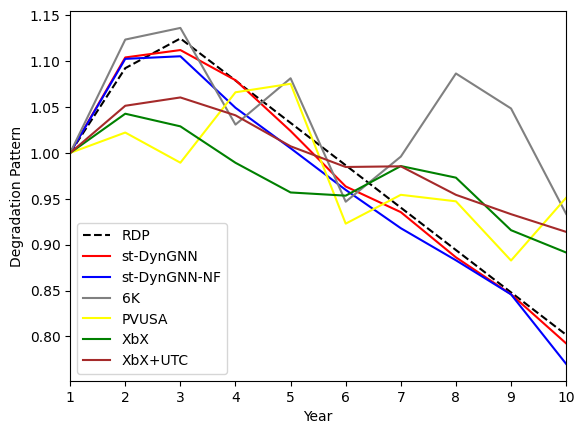

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
L = [[i] for i in range(1,11)]

# plot lines
plt.plot(L, RDP[10], label = "RDP", linestyle="--", color = 'black')
plt.plot(L, EDP[10], label = "st-DynGNN", linestyle="-", color = 'red')
plt.plot(L, EDP_NF[10], label = "st-DynGNN-NF", linestyle="-", color = 'blue')
plt.plot(L, EDP_6K[10], label = "6K", linestyle="-", color = 'grey')
plt.plot(L, EDP_PVUSA[10], label = "PVUSA", linestyle="-", color = 'yellow')
plt.plot(L, EDP_XbX[10], label = "XbX", linestyle="-", color = 'green')
plt.plot(L, correction[10], label = "XbX+UTC", linestyle="-", color = 'brown')
plt.xlabel('Year')
plt.ylabel('Degradation Pattern')
# plt.plot(L, h_f[15].detach().numpy(), label = "Fluctuation", linestyle="-.", color = 'black')
plt.legend()
plt.margins(x=0)
plt.savefig("gdrive/My Drive/Wavelet_GNN_PLR/Case2_RDP_EDP.png",transparent=True, dpi=1000)
plt.show()

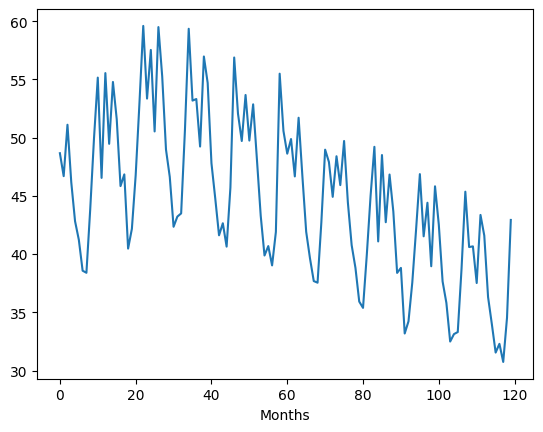

In [ ]:
plt.plot(x[10].detach().numpy())
plt.xlabel('Months')
plt.show()

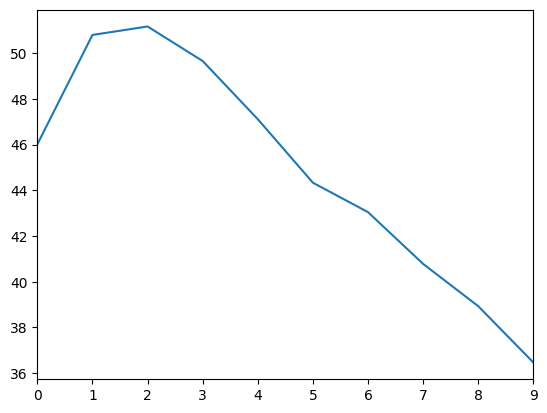

In [ ]:
plt.plot((EDP.loc[:,10]))
plt.margins(x=0)
plt.savefig("gdrive/My Drive/Wavelet_GNN_PLR/V10_aging.png",transparent=True, dpi=1000)
# plt.xlabel('Years')
plt.show()

# plt.plot(x[10].detach().numpy())
# plt.margins(x=0)
# plt.savefig("gdrive/My Drive/Wavelet_GNN_PLR/V10_raw.png",transparent=True, dpi=1000)
# plt.plot((h_a[15]).detach().numpy())

In [ ]:
PLR_matrix[:,1]
# list_PLR = PLR_matrix[:,1]
list_PLR = x[1,:]
PLR_array = []
for i in range(108):
  PLR_array.append(((list_PLR[i+12]-list_PLR[i])/list_PLR[i]).detach().numpy())
PLR_array

[array(0.10970708, dtype=float32),
 array(0.03039652, dtype=float32),
 array(0.04285363, dtype=float32),
 array(0.08714645, dtype=float32),
 array(0.04205647, dtype=float32),
 array(0.10659851, dtype=float32),
 array(0.02206165, dtype=float32),
 array(0.07034994, dtype=float32),
 array(0.04008447, dtype=float32),
 array(0.03463258, dtype=float32),
 array(0.05370394, dtype=float32),
 array(0.1182075, dtype=float32),
 array(0.01137681, dtype=float32),
 array(0.00043888, dtype=float32),
 array(0.06693698, dtype=float32),
 array(0.05577524, dtype=float32),
 array(0.05615729, dtype=float32),
 array(-0.01322695, dtype=float32),
 array(0.04053684, dtype=float32),
 array(0.02216236, dtype=float32),
 array(-0.06957265, dtype=float32),
 array(-0.04089655, dtype=float32),
 array(0.00236343, dtype=float32),
 array(0.00625624, dtype=float32),
 array(-0.06236607, dtype=float32),
 array(-0.01399742, dtype=float32),
 array(-0.03088327, dtype=float32),
 array(0.00176843, dtype=float32),
 array(-0.01211

Text(0, 0.5, 'Probability Density')

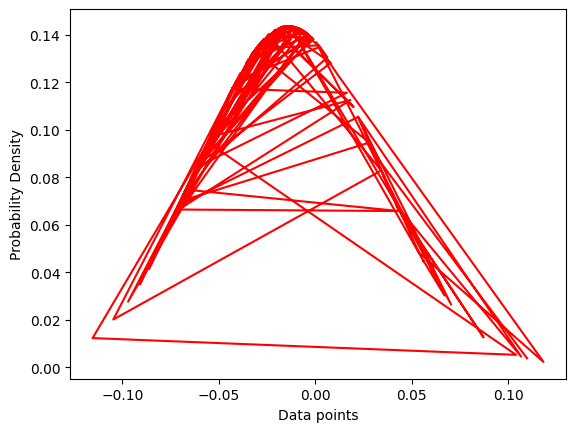

In [ ]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt

# Creating a series of data of in range of 1-50.
x = PLR_array

#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

#Calculate mean and Standard deviation.
mean = np.mean(x)
sd = np.std(x)

#Apply function to the data.
pdf = normal_dist(x,mean,sd)

#Plotting the Results
plt.plot(x,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch-geometric-temporal 0.54.0 requires pandas<=1.3.5, but you have pandas 2.0.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.


In [ ]:
numpy_array = (h_a.T).detach().numpy()
df = pd.DataFrame(numpy_array)
df.columns = PLR
df.to_csv('gdrive/My Drive/Wavelet_GNN_PLR/Aging_Part.csv')

In [ ]:
df

,-0.030231,-0.029494,-0.028221,-0.042149,-0.033339,-0.044973,-0.044380,-0.047872,-0.058477,-0.049660,...,-0.035811,-0.014470,-0.015804,-0.012024,-0.012684,-0.014237,-0.012207,-0.013680,-0.009792,-0.011249
0,45.440254,45.433338,45.421387,45.552082,45.469421,45.578598,45.573029,45.605804,45.705376,45.622601,...,41.621029,41.448296,41.459103,41.428497,41.433826,41.446396,41.429970,41.441902,41.410427,41.422226
1,45.382092,45.372089,45.354786,45.543930,45.424282,45.582279,45.574234,45.621647,45.765659,45.645931,...,42.010040,41.748245,41.764614,41.718231,41.726318,41.745380,41.720493,41.738541,41.690861,41.708733
2,43.994652,43.977318,43.947353,44.275085,44.067776,44.341530,44.327583,44.409744,44.659317,44.451832,...,41.356983,40.909863,40.937805,40.858597,40.872425,40.904957,40.862438,40.893284,40.811836,40.842365
3,44.047443,44.024807,43.985695,44.413506,44.142891,44.500256,44.482059,44.589317,44.915134,44.644257,...,41.505325,40.908604,40.945896,40.840202,40.858635,40.902073,40.845306,40.886486,40.777794,40.818531
4,43.853275,43.825371,43.777168,44.304504,43.970940,44.411423,44.389004,44.521187,44.922737,44.588905,...,40.929523,40.194141,40.240120,40.109863,40.132572,40.186108,40.116154,40.166901,40.032948,40.083153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,36.831860,36.926357,37.089554,35.303886,36.433426,34.941875,35.017799,34.570190,33.210476,34.340893,...,33.858959,36.440868,36.279499,36.736847,36.657070,36.469154,36.714706,36.536541,37.006870,36.830589
116,36.066345,36.162056,36.327324,34.518944,35.662846,34.152336,34.229233,33.775944,32.399021,33.543747,...,33.902370,36.509914,36.346935,36.808826,36.728268,36.538483,36.786469,36.606522,37.081532,36.903500
117,35.361717,35.457581,35.623116,33.811749,34.957554,33.444519,33.521545,33.067482,31.688183,32.834885,...,33.952312,36.574734,36.410824,36.875347,36.794331,36.603455,36.852867,36.671898,37.149609,36.970558
118,35.840500,35.934830,36.097740,34.315186,35.442764,33.953804,34.029602,33.582771,32.225456,33.353878,...,33.816921,36.398998,36.237617,36.694992,36.615211,36.427277,36.672852,36.494671,36.965027,36.788738


In [ ]:
((1+2*2*0.0294939)*(1-8*0.0294939)-1)/10

-0.014581208439072003

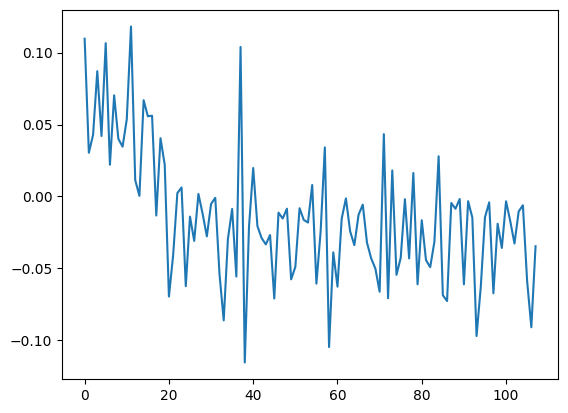

In [ ]:
np.mean(PLR_array)
from matplotlib import pyplot as plt
plt.plot(PLR_array)
plt.show()

In [ ]:
len(PLR_matrix[:,1])

120

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(output_PLR, PLR_derived)
y_true, y_pred = np.array(output_PLR), np.array(PLR_derived)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.004415694590383514
PLR MAPE of 100 simulated inverters is: 29.361330255529573%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(PLR, PLR_derived)
y_true, y_pred = np.array(PLR), np.array(PLR_derived)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.00030562381222692877
PLR MAPE of 100 simulated inverters is: 11.159017718388412%


In [ ]:
df = pd.DataFrame(columns=["PLR_Pred", "Ground_Truth"])
df["PLR_Pred"] = y_pred
df["Ground_Truth"] = y_true
df.to_csv("gdrive/My Drive/Wavelet_GNN_PLR/PLR_Pred.csv",index=False)

In [ ]:
pip install pandas --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch-geometric-temporal 0.54.0 requires pandas<=1.3.5, but you have pandas 2.0.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.


In [ ]:
y_pred[80:100]

array([-0.00335599, -0.00324743, -0.00308648, -0.00314634, -0.00351934,
       -0.00415659, -0.00387217, -0.00563273, -0.00678621, -0.00541384,
       -0.00571872, -0.00492788, -0.00595539, -0.0072596 , -0.00675968,
       -0.0074195 , -0.00801351, -0.01031323, -0.01000564, -0.00822212],
      dtype=float32)

In [ ]:
y_true[80:100]

array([-0.003575 , -0.0034845, -0.0033507, -0.0034002, -0.0037113,
       -0.0042431, -0.0040057, -0.0054764, -0.0064417, -0.0052934,
       -0.0055483, -0.0048872, -0.0057463, -0.0068382, -0.0064195,
       -0.0069722, -0.0074702, -0.0093998, -0.0091428, -0.0076451])

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(PLR, PLR_derived)
y_true, y_pred = np.array(PLR), np.array(PLR_derived)
y_pred = y_pred[60:80]
y_true = y_true[60:80]
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.00030562381222692877
PLR MAPE of 100 simulated inverters is: 13.589945011763682%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(PLR, PLR_derived)
y_true, y_pred = np.array(PLR), np.array(PLR_derived)
print("PLR MAE of 100 simulated inverters is: "+str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.027986674755683776
PLR MAPE of 100 simulated inverters is: 599.9711138683679%
